# Classification des iris à l'aide des k plus proches voisins 

On se propose de classifier les iris suivant leurs quatre caractéristiques (longueur et largeur des sépales et des pétales).
Nous utilisons pour cela le data set "iris" que nous avons découvert au TP1.

Les objectifs de ce TP sont :
- de vous faire découvrir les principales bibliothèques et fonctions de scikit-learn permettant la mise en oeuvre de kNN
- de commencer à mettre en oeuvre la méthodologie générale de développement d'un modèle de classification supervisé

In [16]:
#On commence par importer nos bibliothèques habituelles
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [17]:
%matplotlib notebook

## 1) Le data set
La première phase de notre méthode générale consiste à 
- a) importer, 
- b) structurer et
- b) visualiser notre jeu de données

In [18]:
# On importe et on structure les données
iris = datasets.load_iris()
iris.keys()
X = iris.data  
Y = iris.target
print(Y)
# Ici, on n'a pas de structuration particulière, on conserve le jeu de données tel qu'il est sans modifier 
# les caractéristiques ni les étiquettes

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<IPython.core.display.Javascript object>


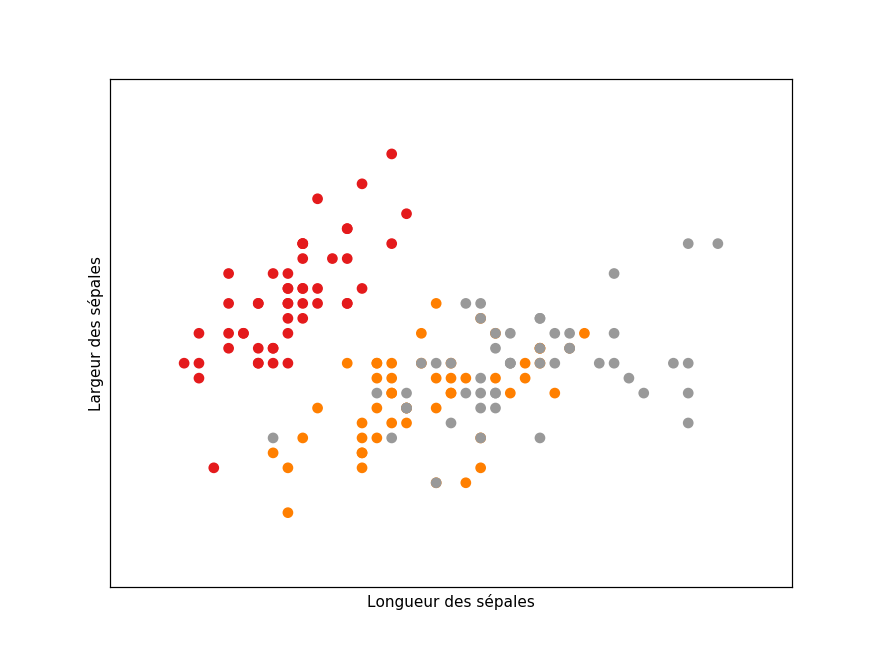

([], <a list of 0 Text yticklabel objects>)

In [19]:
from mpl_toolkits import mplot3d
# On représente les données pour se faire une petite idée
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
fig=plt.figure(0, figsize=(8, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1],c=Y,cmap=plt.cm.Set1)
plt.xlabel('Longueur des sépales')
plt.ylabel('Largeur des sépales')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())



- d) La dernière phase de préparation des données consiste à scinder les données en un jeu de données d'apprentissage et un jeu de test

In [5]:
from sklearn.model_selection import train_test_split
# A l'aide de train_test_split, partager les données en un jeu d'apprentissage (80%) et un jeu de test (20%)
Xa,Xt,Ya,Yt=train_test_split(X,Y, test_size=0.2,shuffle=True) # Xapprentissage,XTest,Yapprentissage,YTest
print(len(Xa),len(Xt))

120 30


<IPython.core.display.Javascript object>


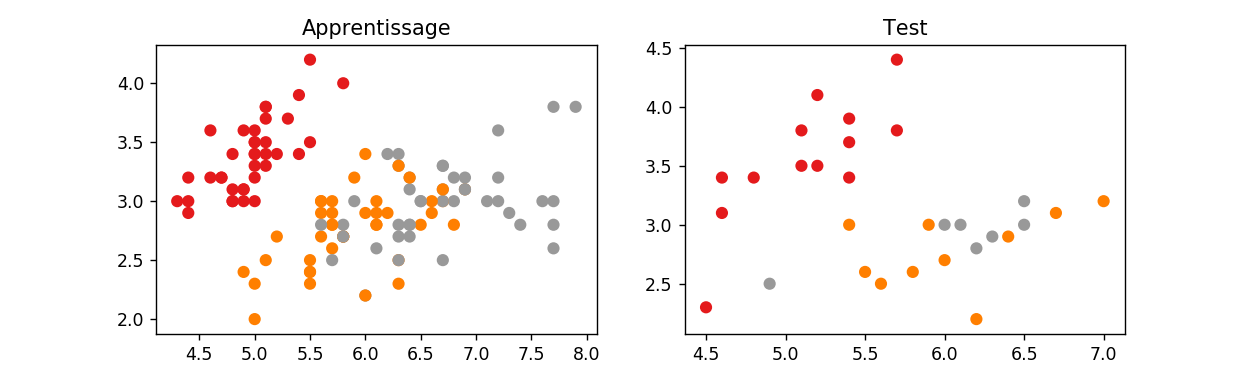

Text(0.5, 1.0, 'Test')

In [6]:
# Représenter sur une même figure les deux jeux de données
# On représente les données pour se faire une petite idée

plt.figure(figsize=(10, 3))
plt.xlabel('Longueur des sépales')
plt.ylabel('Largeur des sépales')
# première colonne
plt.subplot(1,2,1)
plt.scatter(Xa[:, 0], Xa[:, 1],c=Ya,cmap=plt.cm.Set1)
plt.title("Apprentissage")
# deuxieme colonne
plt.subplot(1,2,2)
plt.scatter(Xt[:, 0], Xt[:, 1],c=Yt,cmap=plt.cm.Set1)
plt.title("Test")

## 2) Apprentissage
La deuxième phase est l'apprentissage du modèle à l'aide des données d'apprentissage

In [7]:
# Entraîner un modèle du plus proche voisin à l'aide de la  fonction KNeighborsClassifier de sklearn et de la méthode fit.

from sklearn.neighbors import KNeighborsClassifier

# noter le rôle des paramètres metric et n_neighbors
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(Xa, Ya) #On entraine sur les valeurs d'apprentissage
print(neigh.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


## 3) Analyse des performances du modèle
 
Le but est maintenant de tester notre modèle sur les données de test et de découvrir différentes méthodes pour 
- a) évaluer les performances d'un modèle
- b) comparer deux modèles
- c) optimiser les paramètres du modèle pour éviter en particulier le sur-apprentissage
- d) estimer si le nombre de données est suffisant


In [8]:
# Comparer les étiquettes des données de test aux valeurs prédites à l'aide de la méthode predict
pred=neigh.predict(Xt)
print("Valeurs prédites  ",pred)
print("Valeurs étiquettes",Yt)

Valeurs prédites   [0 1 2 0 0 0 0 1 2 1 2 0 0 1 1 2 1 2 1 0 0 1 0 1 0 1 1 0 0 2]
Valeurs étiquettes [0 2 2 0 0 0 0 1 2 1 2 0 0 1 1 2 1 2 1 0 0 1 0 1 0 1 2 0 0 1]


In [9]:
# Calculer le score de votre modèle à l'aide de la méthode score :
# sur les données d'apprentissage?
print("Un voisin:")
print("Score sur valeurs d'apprentissages :",neigh.score(Xa, Ya)) 

# sur les données de test?
print("Score sur valeurs de tests         :",neigh.score(Xa, Ya)) 


Un voisin:
Score sur valeurs d'apprentissages : 1.0
Score sur valeurs de tests         : 1.0


In [10]:
# Reprendre les phases d'apprentissage et de calcul de score  en utilisant les 3 plus proches voisins
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(Xa, Ya)

# sur les données d'apprentissage?
print("3 voisins:")
print("Score sur valeurs d'apprentissages :",neigh.score(Xa, Ya)) 

# sur les données de test?
print("Score sur valeurs de tests         :",neigh.score(Xa, Ya)) 

3 voisins:
Score sur valeurs d'apprentissages : 0.9916666666666667
Score sur valeurs de tests         : 0.9916666666666667


In [11]:
# Effectuer une validation croisée à 5 répétitions, soit à la main, 
# soit à l'aide de la fonction cross_val_score. On prendra la moyenne des scores obtenus
from sklearn.model_selection import cross_val_score

print(cross_val_score(neigh, X, Y, cv=5)) #On prend les données initiales ( fit implicite)

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


[0.96, 0.9466666666666665, 0.9666666666666668, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9800000000000001, 0.9800000000000001, 0.9733333333333334, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666666, 0.9666666666666668, 0.96]


<IPython.core.display.Javascript object>


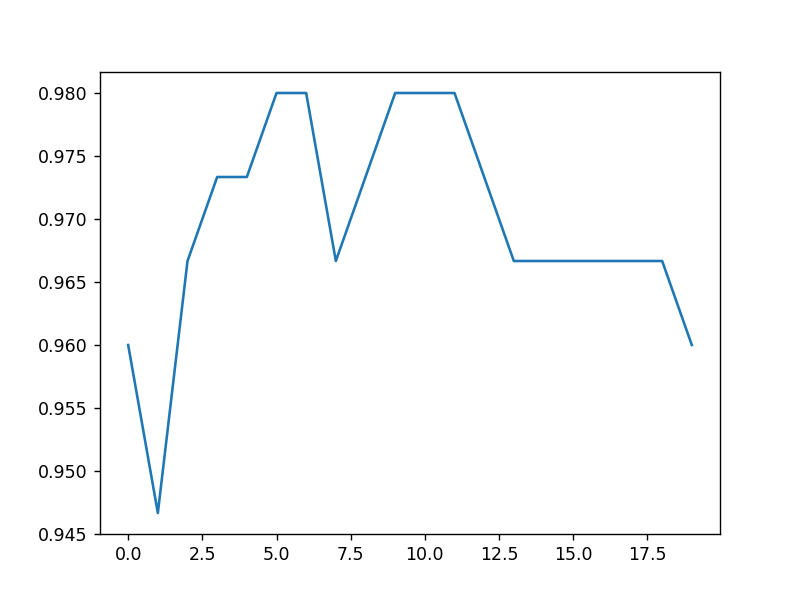

In [12]:
# Rechercher le meilleur nombre de voisins entre 1 et 20 en comparant les résultats d'une validation croisée :
# Représenter graphiquement les scores obtenus :
L=[]
for i in range(1,21) :
    neigh = KNeighborsClassifier(n_neighbors=i)
    #neigh.fit(Xa, Ya)
    score = cross_val_score(neigh, X, Y, cv=5)
    L.append(score.mean()) #moyenne
print(L)
plt.figure()
plt.plot(L)

In [13]:
# Et si on modifiait aussi les distances utilisées!
# Utiliser la fonction GridSearchCV pour comparer simultanément les scores obtenus pour un nombre de voisins variant entre 1 et 20 et 
# les deux distances d1 et d2


In [14]:
from sklearn.model_selection import GridSearchCV
L=list(range(1,21))
param= { "n_neighbors" : L, "metric" : ['manhattan','euclidean']}
neigh = KNeighborsClassifier() #estimator
clf = GridSearchCV(neigh, param) 
clf.fit(X, Y)
clf.best_params_

C:\Users\jeffs\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jeffs\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'metric': 'euclidean', 'n_neighbors': 5}

In [1]:
# Afficher le meilleur score obtenu, les meilleurs paramètres et retenir le meilleur modèle sous le nom "monModel"
monModel=clf.best_params_
neigh = KNeighborsClassifier(n_neighbors=monModel['n_neighbors'],metric=monModel['metric'])
neigh.fit(Xa, Ya)

# sur les données d'apprentissage?
print(monModel['n_neighbors']," voisins:")
print("Score sur valeurs d'apprentissages :",neigh.score(Xa, Ya)) 

# sur les données de test?
print("Score sur valeurs de tests         :",neigh.score(Xt, Yt)) 

print(cross_val_score(neigh, X, Y, cv=5))

NameError: name 'clf' is not defined

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
# Afficher la matrice de confusion pour monModel
neigh = KNeighborsClassifier(n_neighbors=monModel['n_neighbors'],metric=monModel['metric'])
neigh.fit(Xa,Ya)
print("Matrice de confusion")
M=confusion_matrix(Yt,neigh.predict(Xt))
print(M)

Matrice de confusion
[[13  0  0]
 [ 0  9  1]
 [ 0  2  5]]


<IPython.core.display.Javascript object>


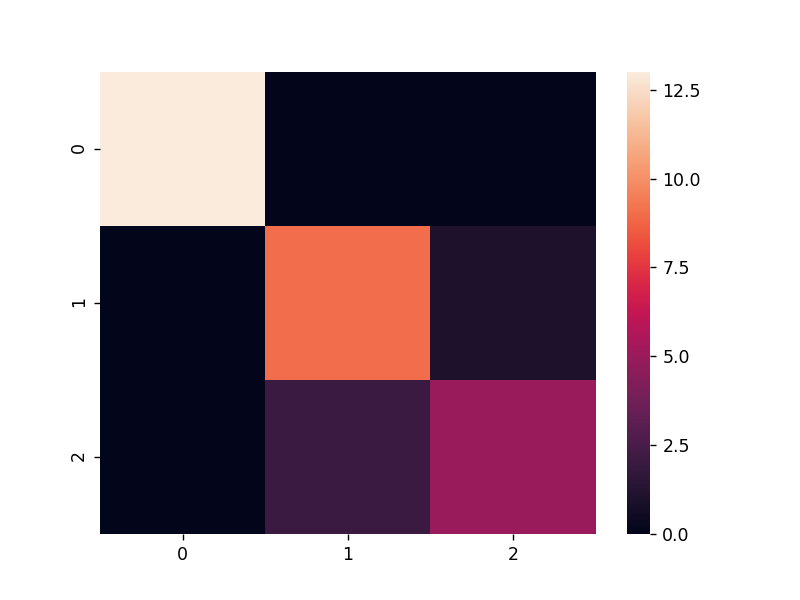

In [18]:
import seaborn as sns
# Afficher cette matrice de confusion à l'aide de la fonction heatmap de seaborn

plt.figure()
sns.heatmap(M)
plt.show()

In [21]:
# d) Ferait-on mieux avec plus de données? : les courbes d'apprentissage
from sklearn.model_selection import learning_curve
neigh = KNeighborsClassifier(n_neighbors=5)
train_sizes, train_scores, test_scores = learning_curve(estimator=neigh, X=X, y=Y, cv=50,train_sizes=np.linspace(0.1, 1.0, 10))
train=[ cv.mean() for cv in train_scores]
test=[ cv.mean() for cv in test_scores]
print(train_sizes)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
[ 14  29  44  58  73  88 102 117 132 147]


<IPython.core.display.Javascript object>


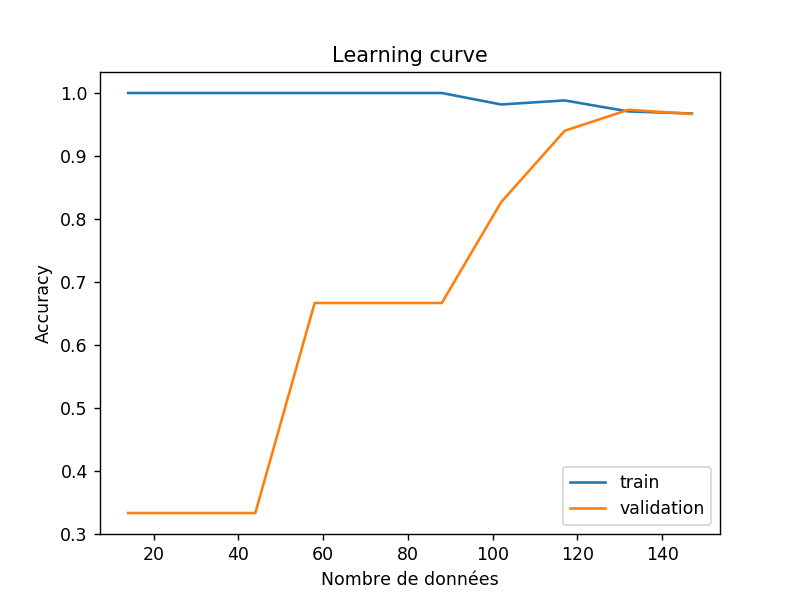

In [20]:
# Afficher à l'aide de la fonction learning_curve la courbe d'apprentissage du modèle monModel.

plt.figure()
plt.plot(train_sizes,train,label='train')
plt.plot(train_sizes,test,label='validation')
plt.title('Learning curve')
plt.xlabel('Nombre de données')
plt.ylabel('Accuracy')
plt.legend()

# La taille du jeu de données vous semble-t-elle suffisante?